# Problem Statement
## Evaluation Project (Baseball Case Study)

 Context:This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

 Input Features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.

 Output: Number of predicted wins (W)

In [1]:
# Importing importent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing data 
df=pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\Week 1\Baseball case study\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
#Renaming columns for better understanding
df.columns='Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
# now we have succesfully change the column names for better understanding
# lests chech the shape of our dataset
df.shape

(30, 17)

In [9]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Game             30 non-null     int64  
 14  Shutouts    

In [10]:
# dose'nt seem to have any null values, but lets confirm it
df.isnull().sum()

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Game               0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

In [11]:
# checking stats of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At_Bats,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Homeruns,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Walks,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strikeouts,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen_Bases,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


## Data Visualization

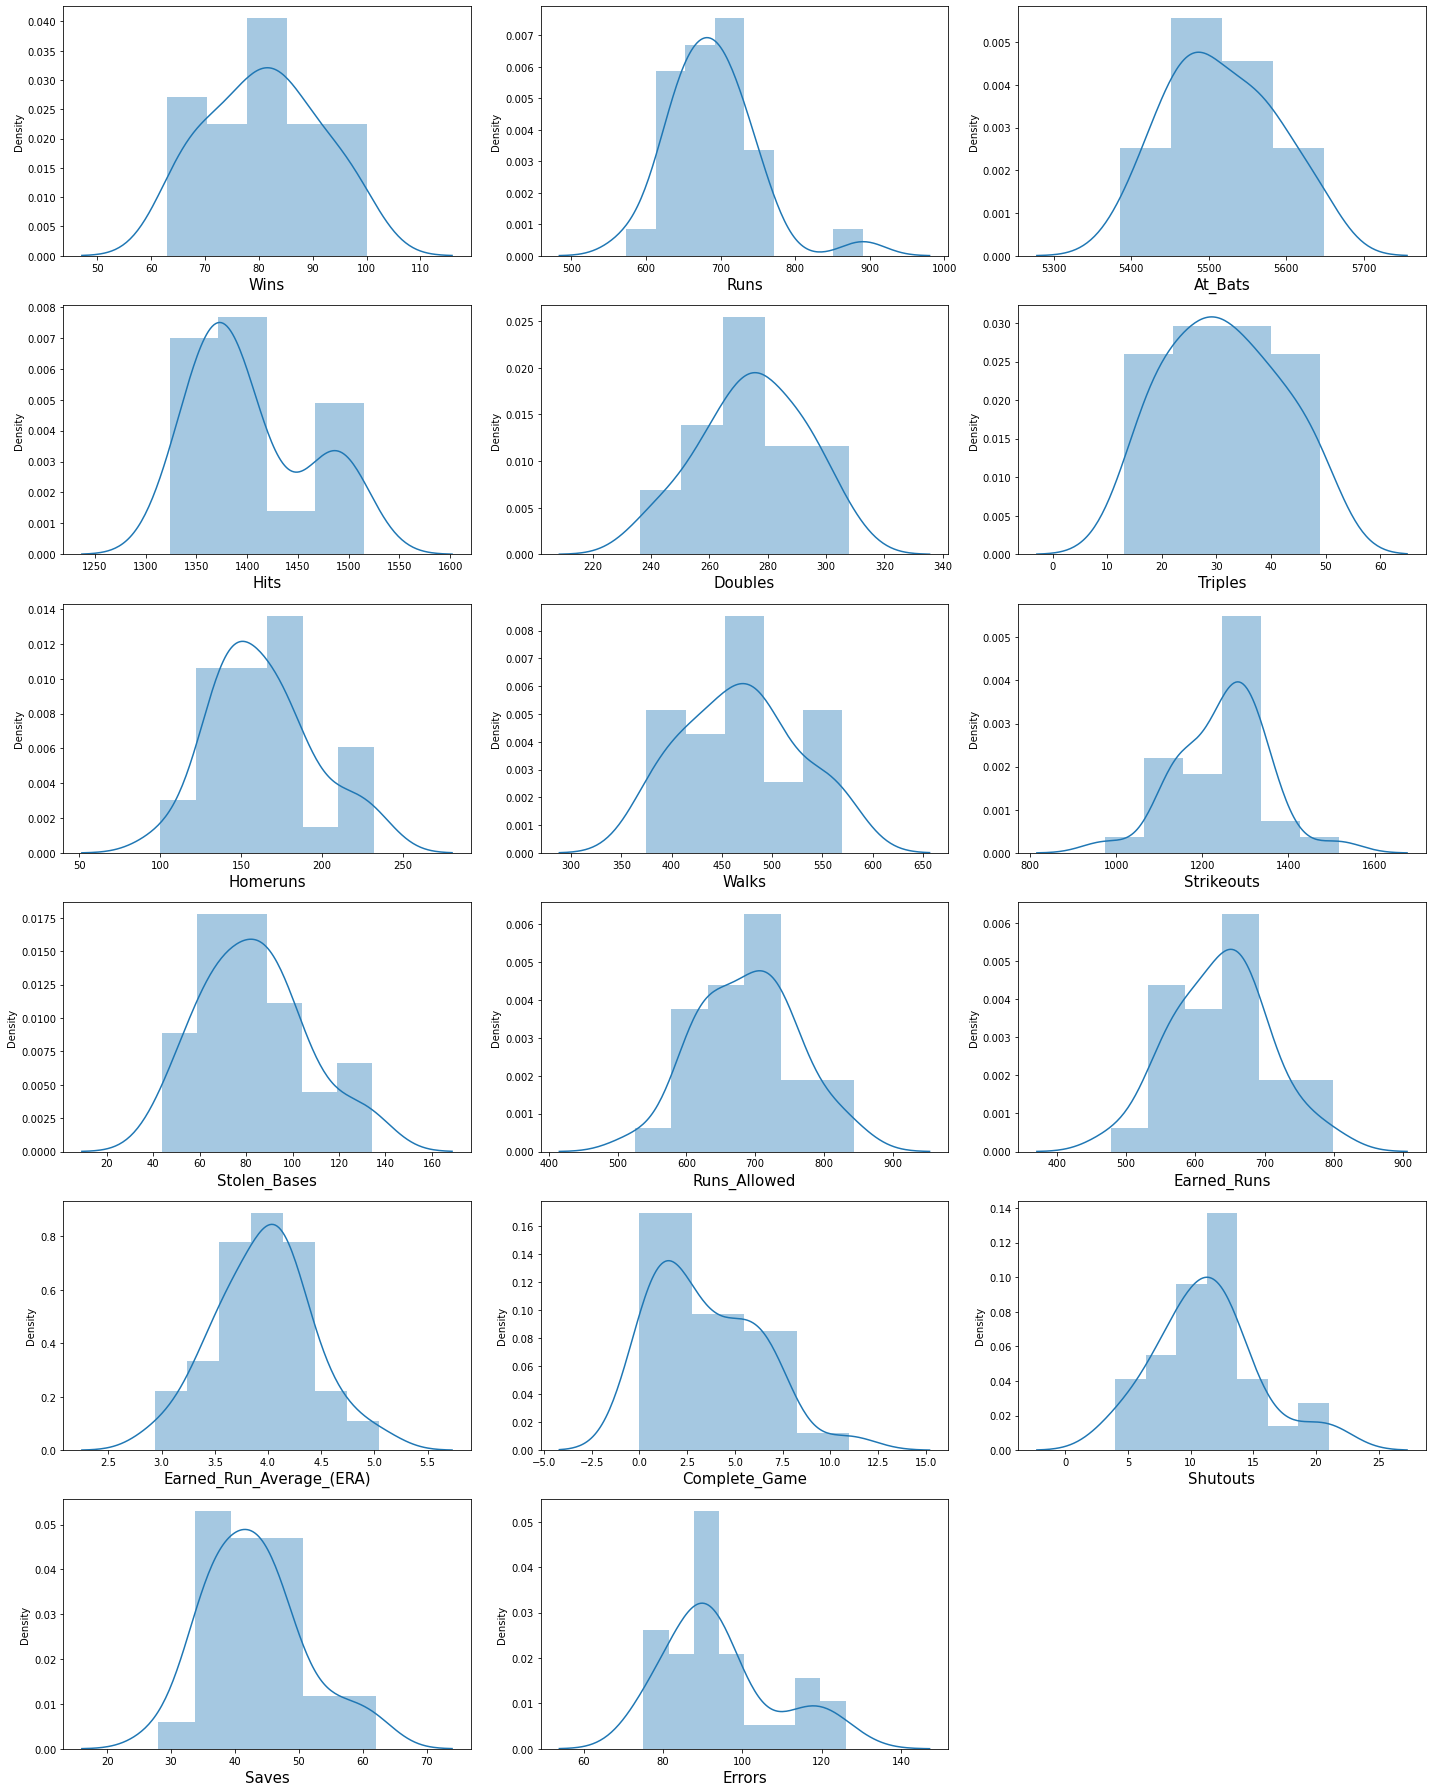

In [12]:
# Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=18 : 
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

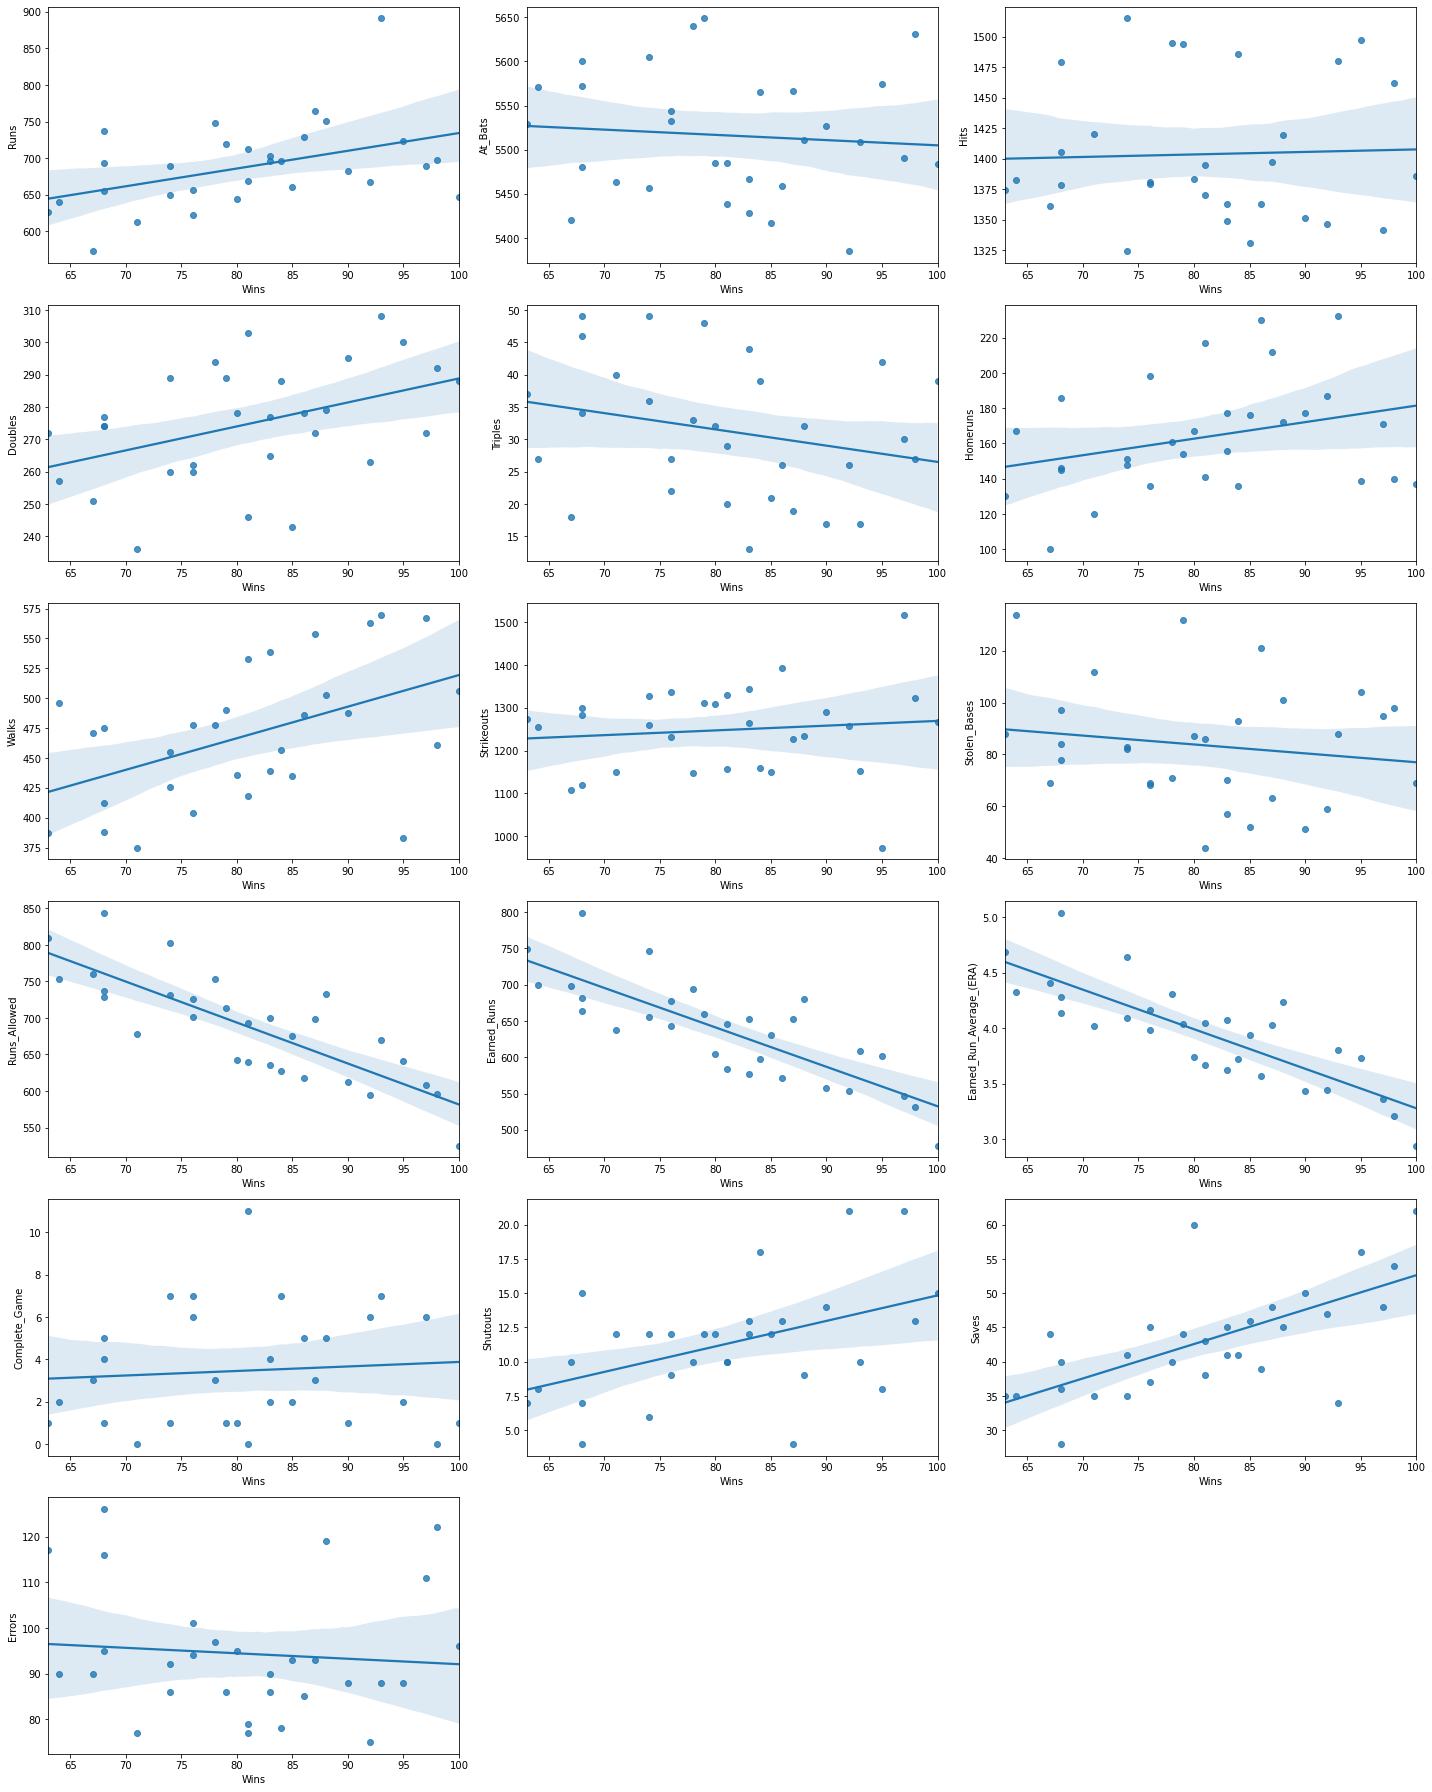

In [14]:
# Comparing Each features with target

X = df.drop(columns=['Wins'])
Y = df['Wins']

plt.figure(figsize=(20,25))
plotnumber=1

for column in X:
    if plotnumber<=18 : 
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

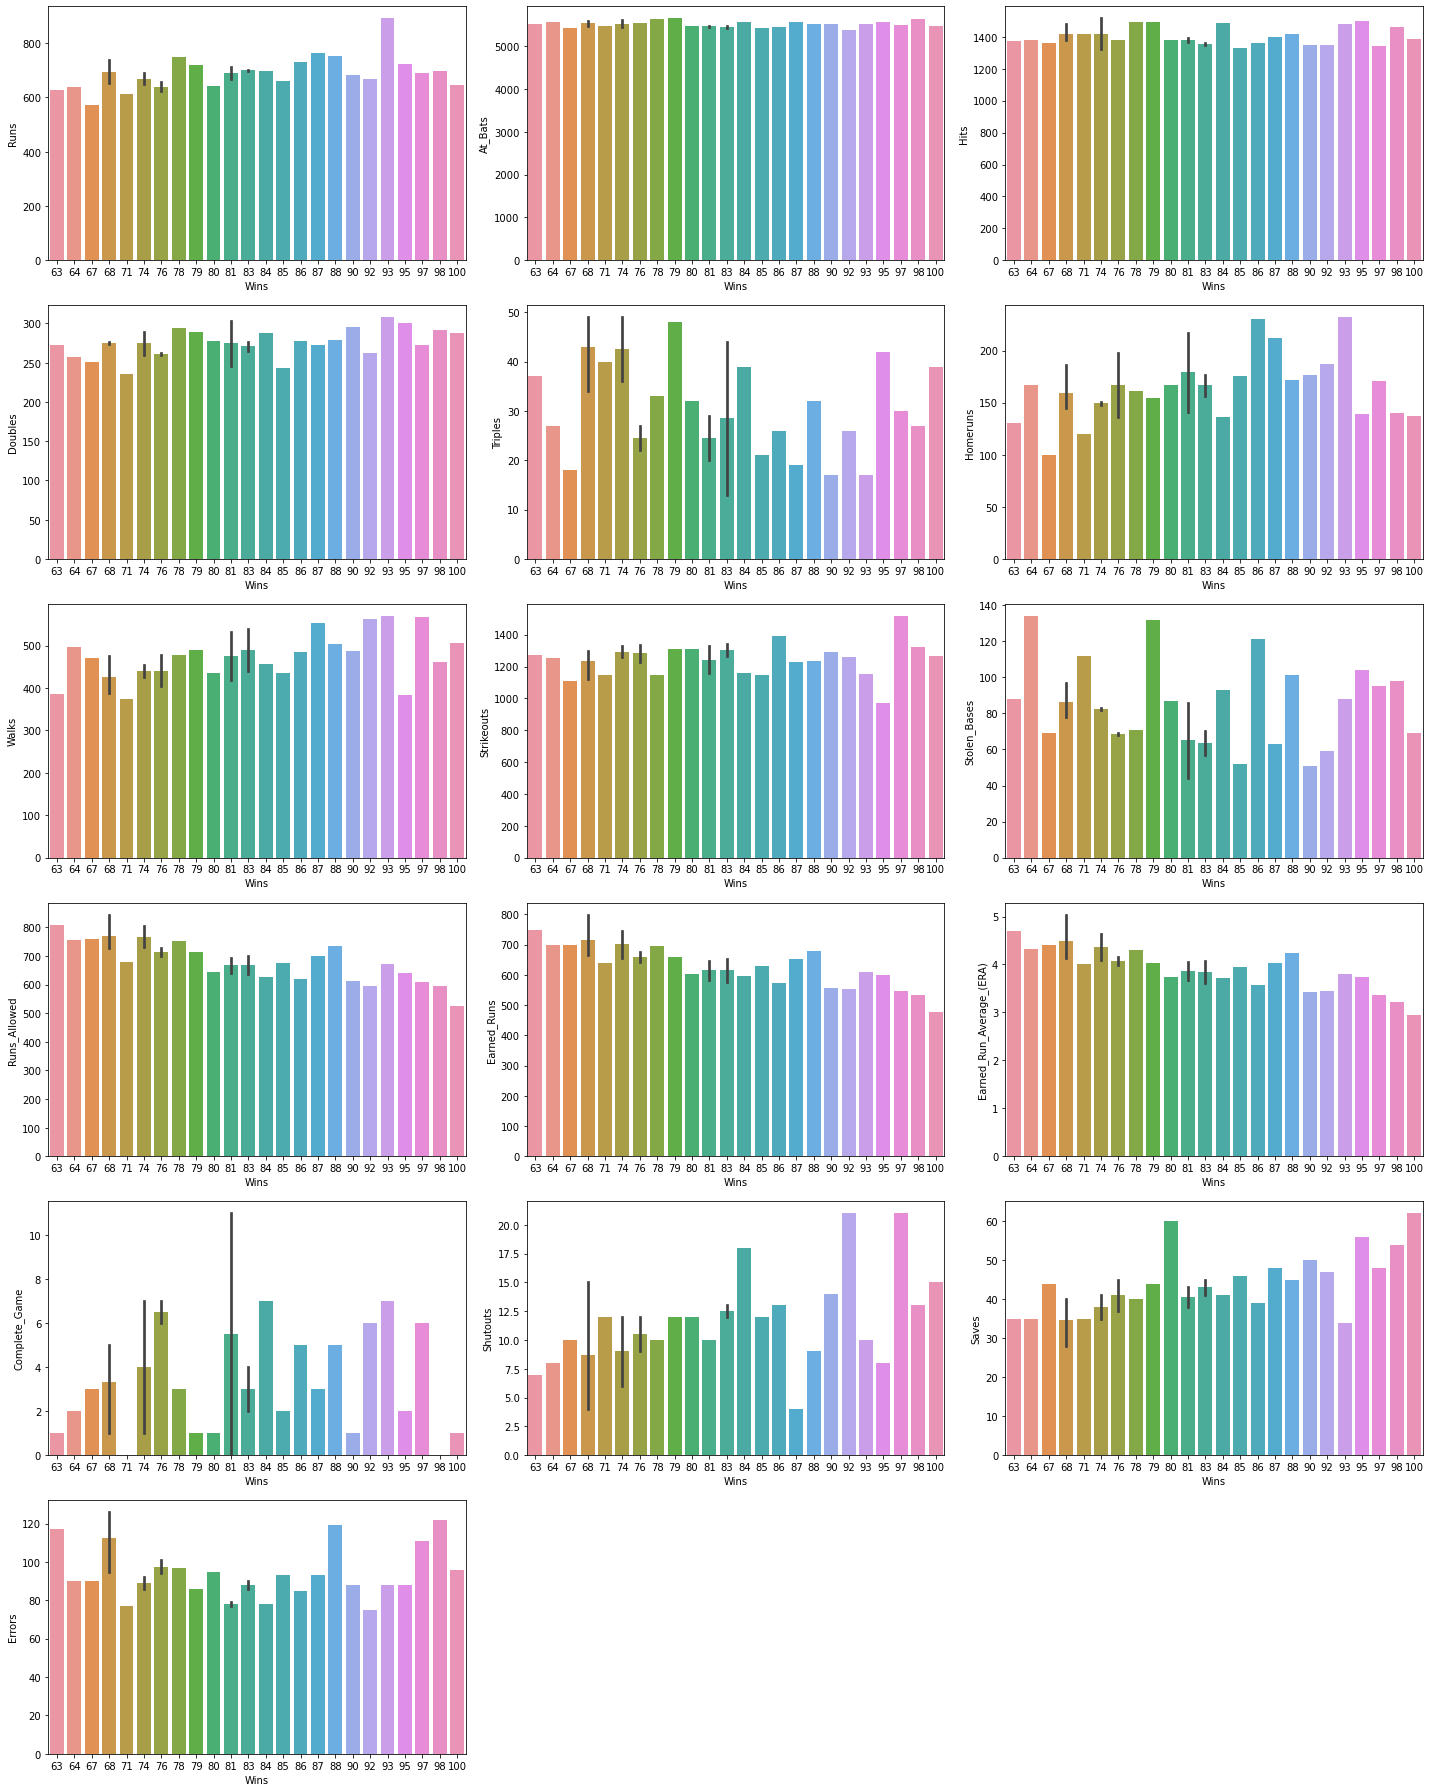

In [15]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in X:
    if plotnumber<=18 : 
        ax=plt.subplot(6,3,plotnumber)
        sns.barplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

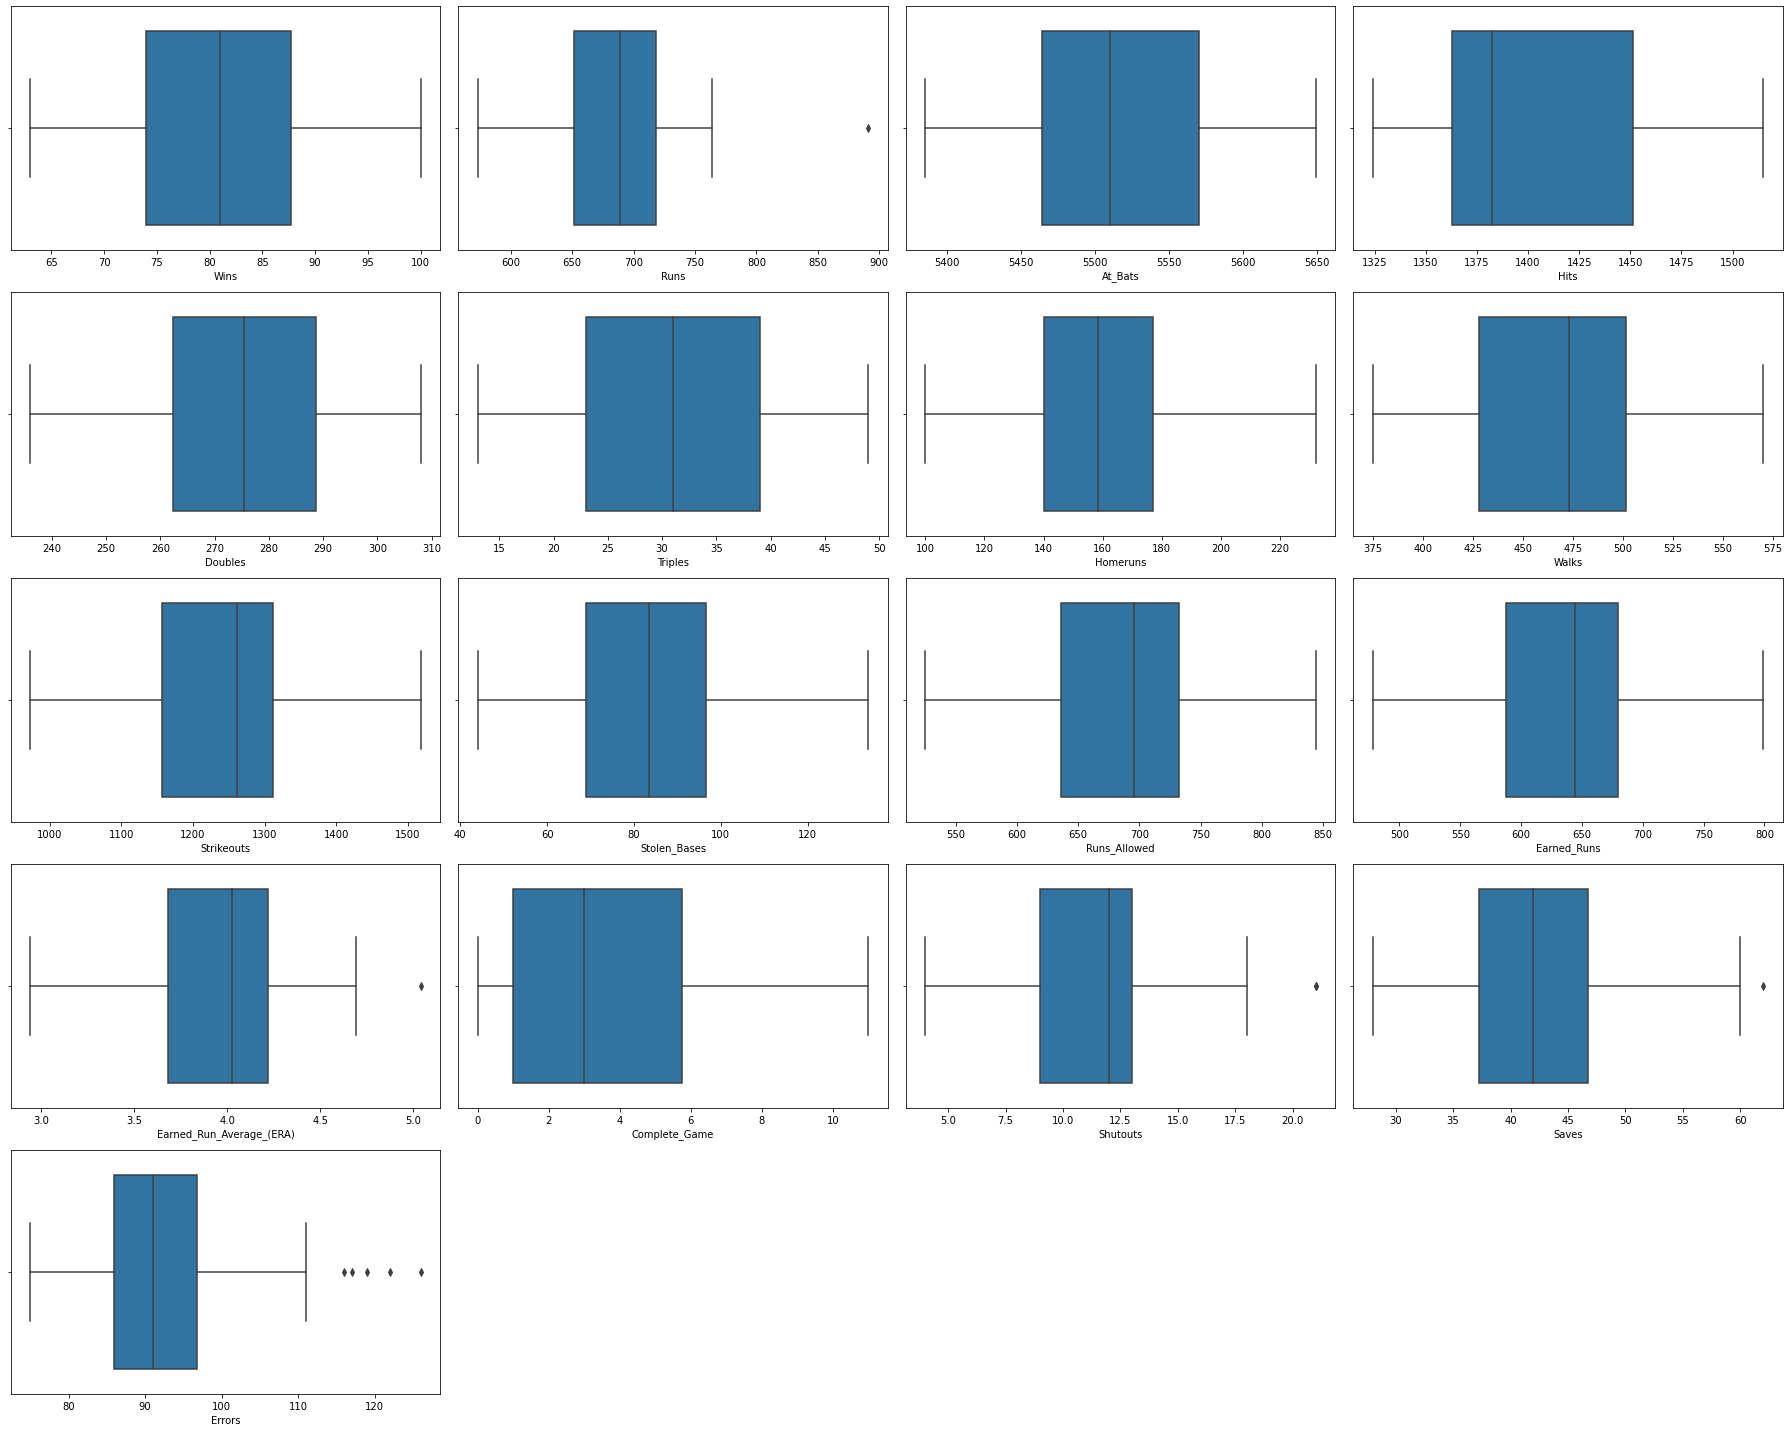

In [16]:
# checking if there is any kind of outlier presence in data or not using box plot
plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column])
        
    plotnumber+=1
plt.tight_layout()


In [17]:
#There are some amount of outlier present in our data we need to remove it any how 

#Removing Outliers using z score

from scipy import stats
z=np.abs(stats.zscore(df))
print(z)
print('row no. : ',np.where(z>3)[0])

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.05110079e-01
  5.06955186e-01 5.39806195e-01 8.14628593e-01 1.67160651e+00
  4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 2.48929848e-01
  2.54597523e-01 5.39806195e-01 1.72800005e-01 2.49879323e-01
  6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 7.51623132e-01
  6.41346840e-01 2.77264091e+00 3.20914294e-01 6.54856158e-01
  1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.03922169e-01
  5.30100415e-02

In [18]:
index = (np.where(z>3)[0])
df1=df.drop(df.index[index])
df1.shape
#Checking Shape after cleaning outliers

(29, 17)

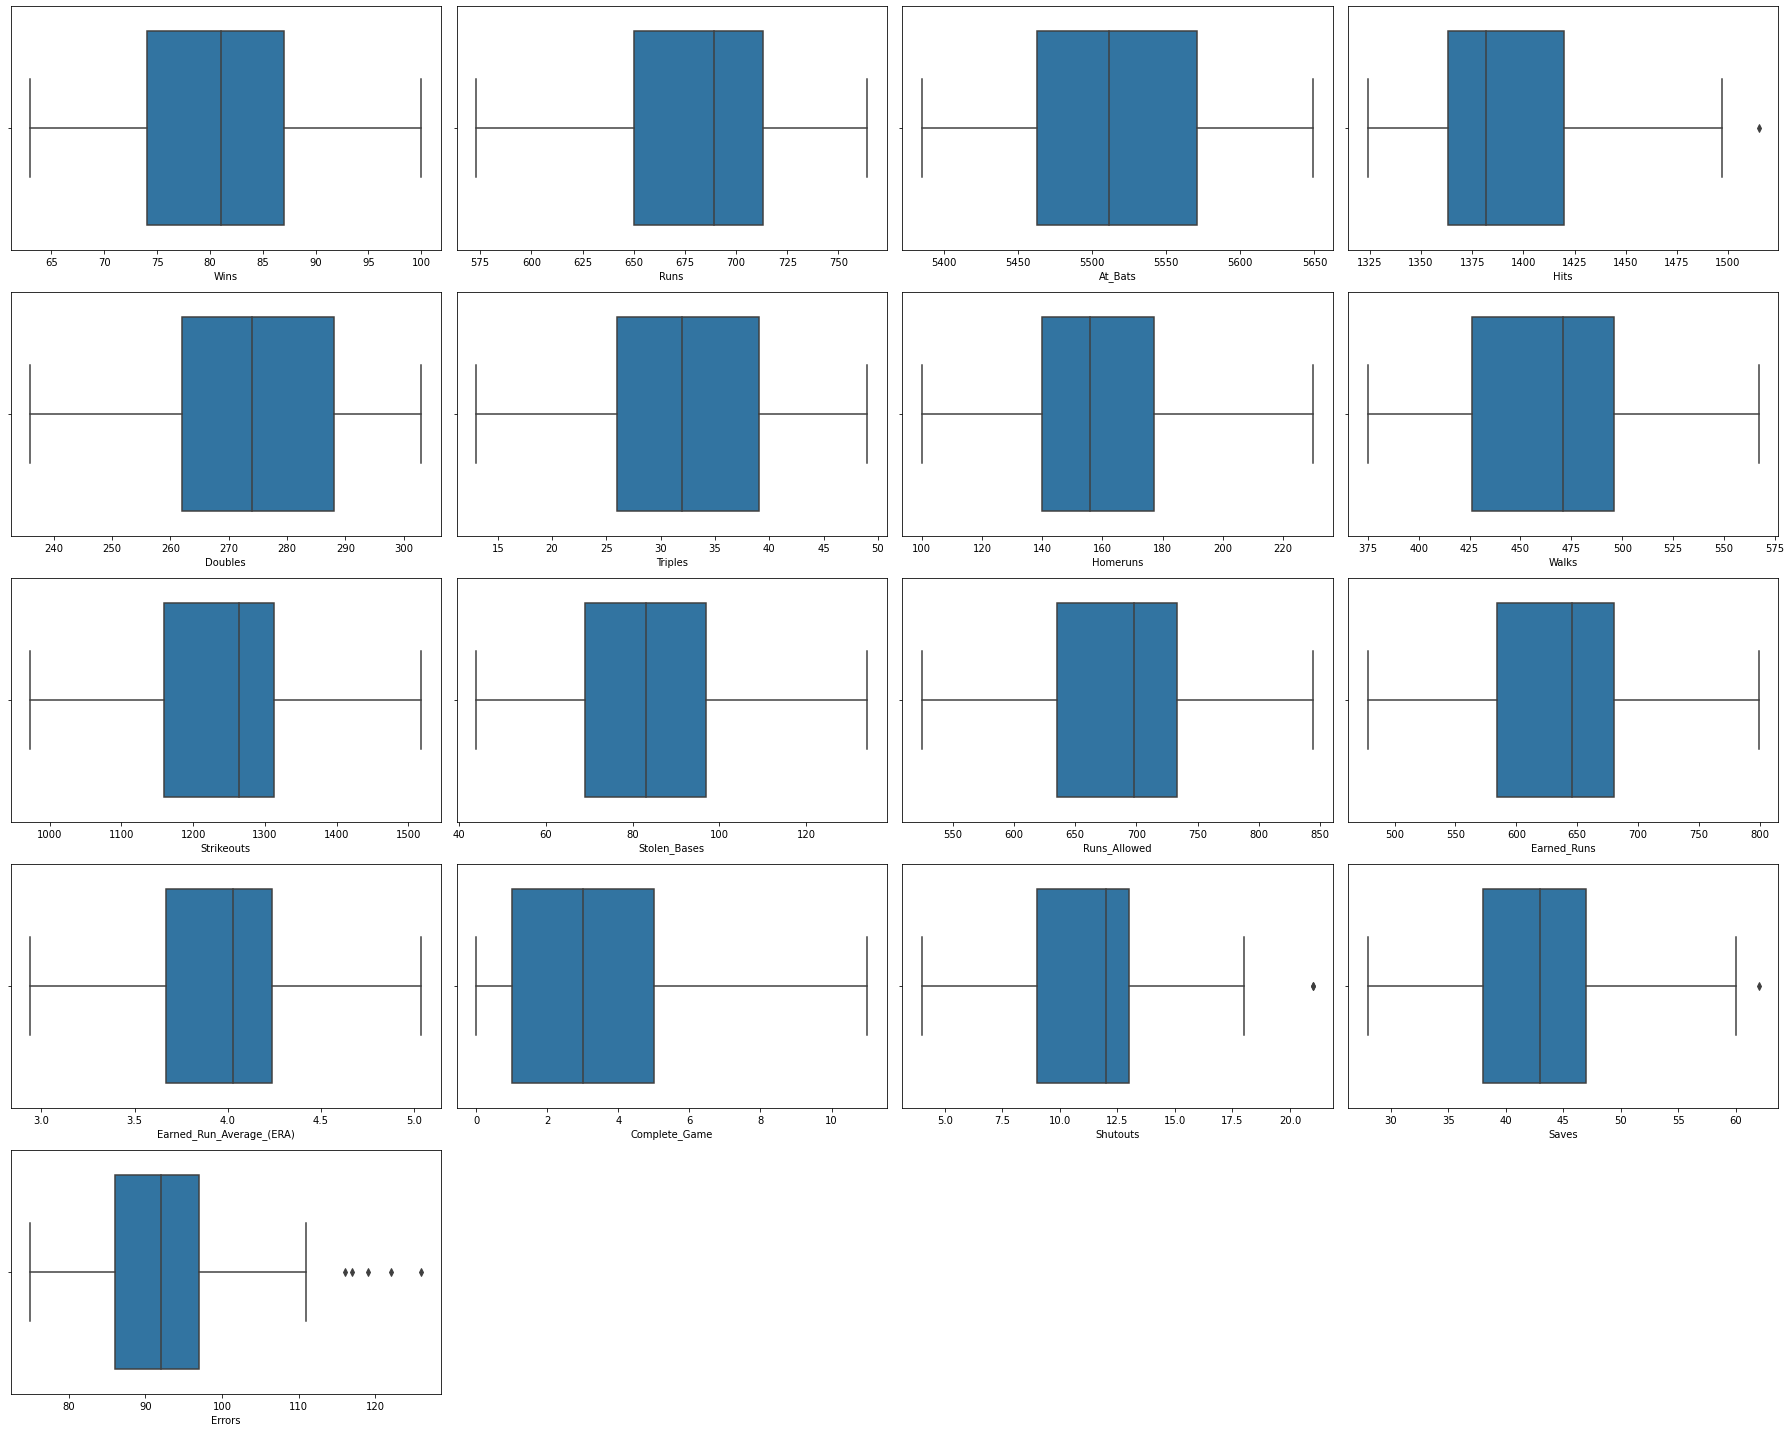

In [19]:
# after removal of outler verry little amount of data is lost which is a good indication for our further process
#Checking with boxplot for cleaned dataset

plt.figure(figsize=(25,20))
plotnumber=1
for column in df1:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df1[column])
        
    plotnumber+=1
plt.tight_layout()

### Since outliers are very less and dataset is small so we will neglect the outliers and go with original dataset.

#### checking skewness

In [20]:
#Checking for skewness
df.skew()

Wins                        0.047089
Runs                        1.200786
At_Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen_Bases                0.479893
Runs_Allowed                0.045734
Earned_Runs                 0.058710
Earned_Run_Average_(ERA)    0.053331
Complete_Game               0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

In [21]:
np.log(df+1).skew()

Wins                       -0.165050
Runs                        0.744813
At_Bats                     0.161062
Hits                        0.628584
Doubles                    -0.375085
Triples                    -0.418009
Homeruns                   -0.009528
Walks                      -0.051289
Strikeouts                 -0.540637
Stolen_Bases               -0.160463
Runs_Allowed               -0.241950
Earned_Runs                -0.278793
Earned_Run_Average_(ERA)   -0.243088
Complete_Game              -0.325962
Shutouts                   -0.589640
Saves                       0.163057
Errors                      0.632916
dtype: float64

In [22]:
df2 = np.log(df+1)

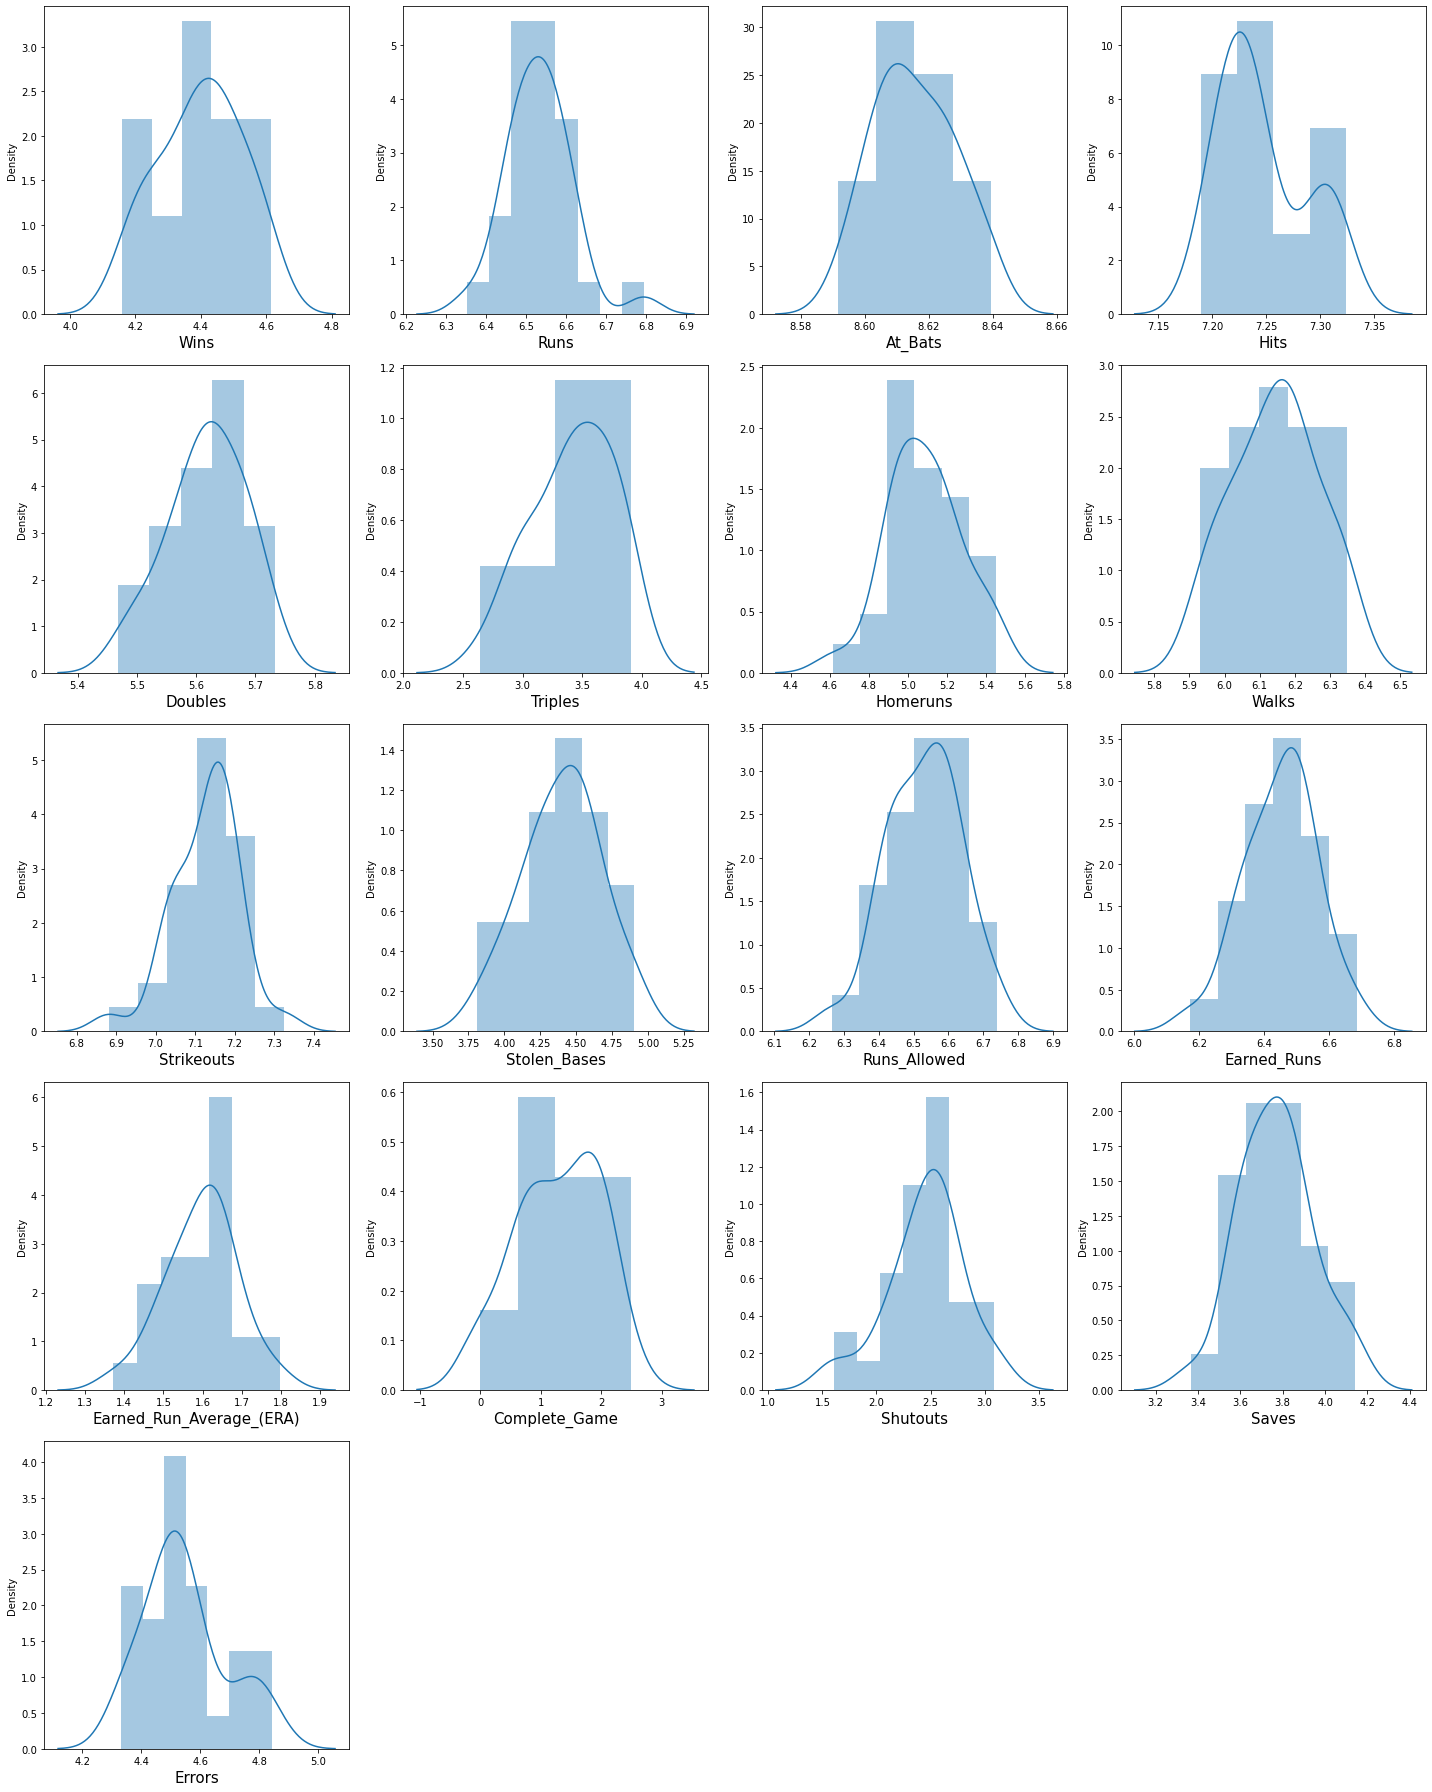

In [23]:
#Visualizing using dist plot:

plt.figure(figsize=(20,25))

plotnumber=1

for column in df2:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column , fontsize=15)
        
    plotnumber+=1
plt.tight_layout()


<AxesSubplot:>

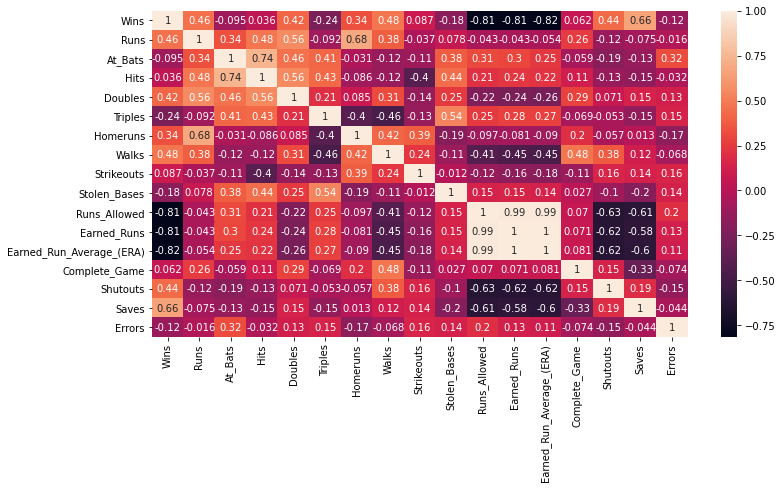

In [24]:
#Checking Correlation between Variables through heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df2.corr() , annot=True)

In [25]:
# Dropping Coloumns with high correlation

df3 = df2.drop(columns=['Runs_Allowed','Earned_Runs'],axis=1)
df3.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,4.564348,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,1.553925,1.098612,2.197225,4.043051,4.488636
1,4.430817,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,1.623341,1.098612,2.564949,3.828641,4.465908
2,4.406719,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,1.541159,2.484907,2.397895,3.663562,4.382027
3,4.343805,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,1.605430,2.079442,2.302585,3.637586,4.624973
4,4.317488,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,1.729884,2.079442,2.564949,3.583519,4.465908


In [26]:
df3.shape

(30, 15)

## Model building

In [35]:
#Splitting data into Features(x) and target(y)

x = df3.drop(columns=['Wins'])
y = df3['Wins']

In [36]:
#Scaling features

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [37]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.970142842454901  on Random_state  6


In [38]:
#Splitting Data into train and test

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=6)

In [68]:
#Importing Regression Models

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [40]:
results=[]
#To save model scores
MSE=[]
#To save Mean Squared Error scores

### 1) Linear Regression

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
r2_lr=r2_score(y_test,y_lr_pred)

print("R2 SCORE :",r2_lr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_lr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_lr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_lr_pred)))

results.append(r2_lr)
MSE.append(mean_squared_error(y_test,y_lr_pred))

R2 SCORE : 0.9598186503312971
Mean Squared Error :  0.0006929630639717631
Mean Absolute Error :  0.023721184665746353
Root Mean squared Error :  0.026324191610983292


### 2)RandomForestRegressor

In [42]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred=rfr.predict(x_test)
r2_rfr=r2_score(y_test,y_rfr_pred)

print("R2 SCORE :",r2_rfr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rfr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rfr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rfr_pred)))

results.append(r2_rfr)
MSE.append(mean_squared_error(y_test,y_rfr_pred))

R2 SCORE : 0.48888470164752784
Mean Squared Error :  0.008814637290918161
Mean Absolute Error :  0.0782997020851699
Root Mean squared Error :  0.09388629980416824


### 3)GradientBoostingRegressor

In [43]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_gbr_pred=gbr.predict(x_test)
r2_gbr=r2_score(y_test,y_gbr_pred)

print("R2 SCORE :",r2_gbr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_gbr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_gbr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_gbr_pred)))

results.append(r2_gbr)
MSE.append(mean_squared_error(y_test,y_gbr_pred))

R2 SCORE : 0.541795571184549
Mean Squared Error :  0.007902142350501991
Mean Absolute Error :  0.07634840831809486
Root Mean squared Error :  0.08889399501935995


### 4)DecisionTreeRegressor

In [44]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred=dtr.predict(x_test)
r2_dtr=r2_score(y_test,y_dtr_pred)

print("R2 SCORE :",r2_dtr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_dtr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_dtr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_dtr_pred)))

results.append(r2_dtr)
MSE.append(mean_squared_error(y_test,y_dtr_pred))

R2 SCORE : 0.16868357746659446
Mean Squared Error :  0.014336790078942847
Mean Absolute Error :  0.09830875433653896
Root Mean squared Error :  0.1197363356669263


### 5)SVR

In [45]:
svr=SVR()
svr.fit(x_train,y_train)
y_svr_pred=svr.predict(x_test)
r2_svr=r2_score(y_test,y_svr_pred)

print("R2 SCORE :",r2_svr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_svr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_svr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_svr_pred)))

results.append(r2_svr)
MSE.append(mean_squared_error(y_test,y_svr_pred))

R2 SCORE : 0.14117122486178002
Mean Squared Error :  0.014811265035988737
Mean Absolute Error :  0.10090306540799476
Root Mean squared Error :  0.12170154081189251


### 6) Ridge

In [46]:
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
y_rg_pred=rg.predict(x_test)
r2_rg=r2_score(y_test,y_rg_pred)

print("R2 SCORE :",r2_rg)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rg_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rg_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rg_pred)))

results.append(r2_rg)
MSE.append(mean_squared_error(y_test,y_rg_pred))

R2 SCORE : 0.9599241717291687
Mean Squared Error :  0.0006911432537417288
Mean Absolute Error :  0.023690497769888186
Root Mean squared Error :  0.026289603529565234


### 7) Lasso

In [47]:
ls=Lasso(alpha=0.0002)
ls.fit(x_train,y_train)
y_ls_pred=rg.predict(x_test)
r2_ls=r2_score(y_test,y_ls_pred)

print("R2 SCORE :",r2_ls)
print("Mean Squared Error : ",mean_squared_error(y_test,y_ls_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_ls_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_ls_pred)))

results.append(r2_ls)
MSE.append(mean_squared_error(y_test,y_ls_pred))

R2 SCORE : 0.9599241717291687
Mean Squared Error :  0.0006911432537417288
Mean Absolute Error :  0.023690497769888186
Root Mean squared Error :  0.026289603529565234


### Cross validation

In [48]:
cvlr=cross_val_score(rfr,x,y,cv=5)
cvrfr=cross_val_score(rfr,x,y,cv=5)
cvdtr=cross_val_score(dtr,x,y,cv=5)
cvsvr=cross_val_score(svr,x,y,cv=5)
cvgbr=cross_val_score(gbr,x,y,cv=5)
cvrg=cross_val_score(rg,x,y,cv=5)
cvls=cross_val_score(ls,x,y,cv=5)

print("CV SCORE LR : " , cvlr.mean())
print("CV SCORE RFR : " , cvrfr.mean())
print("CV SCORE DTR : " , cvdtr.mean())
print("CV SCORE SVR : " , cvsvr.mean())
print("CV SCORE GBR : " , cvgbr.mean())
print("CV SCORE Ridge : " , cvrg.mean())
print("CV SCORE Lasso : " , cvls.mean())

CV SCORE LR :  -0.7896794434937584
CV SCORE RFR :  -0.8425932410418273
CV SCORE DTR :  -2.4407958858906658
CV SCORE SVR :  -0.5660013689521258
CV SCORE GBR :  -1.287667821646052
CV SCORE Ridge :  0.5600009865025511
CV SCORE Lasso :  0.5942247552802283


In [49]:
# Creating Dataframe

models = pd.DataFrame({"ML Models":["Linear Regression","Random Forest","Gradient Boosting",
                                   "Decision Tree","SVR","Ridge","Lasso"],"Scores":results})

In [50]:
models["Mean Squared Error"]=MSE
models

,ML Models,Scores,Mean Squared Error
0,Linear Regression,0.959819,0.000693
1,Random Forest,0.488885,0.008815
2,Gradient Boosting,0.541796,0.007902
3,Decision Tree,0.168684,0.014337
4,SVR,0.141171,0.014811
5,Ridge,0.959924,0.000691
6,Lasso,0.959924,0.000691


#### According to Model Scores,MSE and CV Linear Regression is best fit model.

## Hyper Parameter Tuning

In [69]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [70]:
grid_para={'copy_X':[True] , 'n_jobs':[1,2] , 'normalize':[False]}
grid_cv = GridSearchCV(LinearRegression(),param_grid=grid_para,cv=5)

#Using 5 fold cross validation
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'n_jobs': [1, 2],
                         'normalize': [False]})

In [71]:
#Getting Best Parameters
grid_cv.best_params_

{'copy_X': True, 'n_jobs': 1, 'normalize': False}

## Applying Best Parameters to Our Model

In [72]:
lr_reg_tuned = LinearRegression(copy_X=True , n_jobs=1 , normalize=False)
lr_reg_tuned.fit(x_train,y_train)
lr_reg_tuned_ypred = lr_reg_tuned.predict(x_test)
r2_score_lr_tuned = r2_score(y_test,lr_reg_tuned_ypred)

print("R2 SCORE :",r2_score_lr_tuned)
print("Mean Squared Error : ",mean_squared_error(y_test,lr_reg_tuned_ypred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,lr_reg_tuned_ypred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,lr_reg_tuned_ypred)))

R2 SCORE : 0.9598186503312971
Mean Squared Error :  0.0006929630639717631
Mean Absolute Error :  0.023721184665746353
Root Mean squared Error :  0.026324191610983292


##### Efficiency Achieved

### Model Saving


In [73]:
# Saving and loading Model

from joblib import dump, load

final_model=lr_reg_tuned
final_model.fit(x,y)
dump(final_model, 'baseball.lib')

['baseball.lib']

In [74]:
load_m = load('baseball.lib')

In [75]:
win=[[6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,1.623341,1.098612,2.564949,3.828641,4.465908]]
load_m.predict(win)

array([4.42989308])

## Conclusion